# Download emissions data using a UKEMS URL

The UKEMS download page (https://dukems-app.test-datalabs.nerc.ac.uk/app/download) allows you to download emissions data and also  copy the download URL for your own use.  This URL specifies which pollutant you want, and also additional filters such as Snap Sector, region of interest and date range.  A full description is at https://dukems-app.test-datalabs.nerc.ac.uk/app/apihelp.

This notebook shows how to use this URL to simply download the data and display it.  It doesn't necessarily demonstrate best practice, but is written to be simple and help you think about how you might automate and integrate it into your own code.


### Install dependencies and import libraries

In [82]:
!pip install xarray
!pip install netCDF4

import requests
import xarray as xr
import matplotlib.pyplot as plt
import io
import re
import os
import warnings

# For clarity, turn off warnings
warnings.filterwarnings('ignore')

### Download emissions data using a UKEMS URL
The URL can obtained from https://dukems-app.test-datalabs.nerc.ac.uk/app/download.
Download the data and save using the filename found in the header of the response.

In [86]:
url = input("Enter a UKEMS emissions download URL")

# Example url
# url = 'https://dukems-app.test-datalabs.nerc.ac.uk/api/download/dataset/5/7/0/0?startYear=2020&endYear=2030&y2=238954&y1=114353&x2=633171&x1=461485'

r = requests.get(url, verify=False, allow_redirects=True)
filename = re.findall('filename=(.+)', r.headers.get('content-disposition'))[0]
open(filename, 'wb').write(r.content)
print(f'Downloaded the file {filename} ({os.path.getsize(filename)} bytes)')

Enter a UKEMS emissions download URL https://dukems-app.test-datalabs.nerc.ac.uk/api/download/dataset/3/0/0/0?startYear=2019&endYear=2030&y2=220236&y1=136039&x2=575710&x1=475980


Downloaded the file dc6837a4-8e43-4211-9b13-867497970b33.nc (414754 bytes)


### Open the downloaded data and view metadata

In [87]:
with xr.open_dataset(filename) as ds:
    print(ds)


<xarray.Dataset>
Dimensions:         (x: 100, y: 84, Time: 12)
Coordinates:
  * x               (x) float64 4.765e+05 4.775e+05 ... 5.745e+05 5.755e+05
  * y               (y) float64 2.195e+05 2.185e+05 ... 1.375e+05 1.365e+05
  * Time            (Time) int32 2019 2020 2021 2022 ... 2027 2028 2029 2030
Data variables:
    emissions_data  (Time, y, x) float32 ...
Attributes:
    title:          Methane: total 1km gridded emissions for the UK across al...
    timestamp:      2022-04-12, 19:02:34
    units:          kilotonne
    pollutant:      Methane
    snapsectors:    Combustion in energy and transformation industries; Non-i...
    yearfilter:     2019 - 2030
    spatialfilter:  475980.0,136039.0 575710.0,220236.0
    source:         DUKEMS Emissions Tool
    CRS:            EPSG:27700


### Plot a time series for a location in the downloaded data

The downloaded data is for a region around central London.  The centre of London has the British National Grid coordinate: 530034,180381.  Putting a 1km box around this coordinate, will restrict the data to nearest 1km square in the data.  Its annual emissions can then be plotted.

Time series for central London:


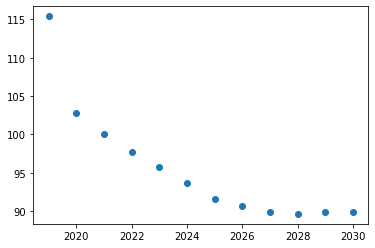

In [88]:
    london_x = 530034
    london_y = 180381
    dataForCentralLondon = ds.sel(x=slice(london_x-500,london_x+500), y=slice(london_y+500,london_y-500))
    emissions = dataForCentralLondon['emissions_data'].data.flatten()
    years =dataForCentralLondon['Time'].data

    print('Time series for central London:')
    plt.scatter(years, emissions)
    plt.show()


### View some data

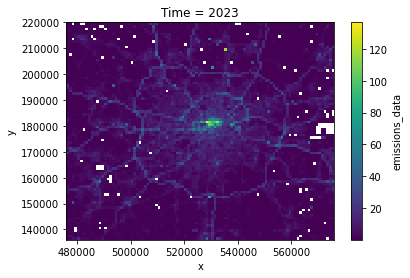

In [89]:
ds.loc[dict(Time=2023)]['emissions_data'].plot()